<a href="https://colab.research.google.com/github/kyashasri/Sales-forecasting/blob/main/Chocolates(weekly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading Dataset
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [2]:
#Removing $ and , from Amounts section
df['Amount']=df['Amount'].replace('[\$]','',regex=True)
df['Amount']=df['Amount'].replace(',','',regex=True)

df['Amount'].isna().sum()

np.int64(0)

In [3]:
#Converting Amount datatype object -> numeric
df['Amount']=pd.to_numeric(df['Amount'],errors='coerce')

In [4]:
# Checking for nulls
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [5]:
#converting datatype of date
df['Date']=pd.to_datetime(df['Date'])

/tmp/ipython-input-5-2911974148.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [6]:
#Sorting dates
df=df.sort_values('Date')

In [7]:
# Adding month,year,weekday columns
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Month', 'Year'],
      dtype='object')

In [8]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year
253,Marney O'Breen,Australia,Smooth Sliky Salty,2022-01-03,3745,170,1,2022
89,Andria Kimpton,Canada,Caramel Stuffed Bars,2022-01-03,7154,348,1,2022
398,Marney O'Breen,Canada,Spicy Special Slims,2022-01-03,3528,336,1,2022
428,Ches Bonnell,UK,White Choc,2022-01-03,3269,226,1,2022
187,Dotty Strutley,UK,99% Dark & Pure,2022-01-03,9310,282,1,2022


In [9]:
# Setting Date section as index
df.set_index('Date',inplace=True)

df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Month,Year
Date,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,3745,170,1,2022
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,7154,348,1,2022
2022-01-03,Marney O'Breen,Canada,Spicy Special Slims,3528,336,1,2022
2022-01-03,Ches Bonnell,UK,White Choc,3269,226,1,2022
2022-01-03,Dotty Strutley,UK,99% Dark & Pure,9310,282,1,2022


In [10]:
df['Month'].value_counts().sort_index()

,count
Month,
1,154
2,110
3,131
4,118
5,135
6,163
7,149
8,134


In [35]:
num_salespersons = df['Sales Person'].nunique()
print(f"Total number of salespersons: {num_salespersons}")

Total number of salespersons: 25


In [36]:
import pandas as pd
import plotly.express as px

# Aggregate total sales per product
total_sales_per_product = df.groupby('Product')['Amount'].sum().reset_index()

# Sort by sales descending
total_sales_per_product = total_sales_per_product.sort_values(by='Amount', ascending=False)

# Choose top N products to display separately
top_n = 5
top_products = total_sales_per_product.head(top_n)

# Sum sales of remaining products as 'Others'
others = total_sales_per_product.iloc[top_n:]
others_sum = others['Amount'].sum()

# Create a DataFrame for 'Others'
others_df = pd.DataFrame([{'Product': 'Others', 'Amount': others_sum}])

# Concatenate top products with 'Others'
top_products = pd.concat([top_products, others_df], ignore_index=True)

# Plot pie chart with Plotly Express
fig = px.pie(
    top_products,
    names='Product',
    values='Amount',
    hole=0.4,
    title=f'Sales Distribution: Top {top_n} Products and Others'
)

# Customize trace labels to show only percent (to avoid clutter inside chart)
fig.update_traces(textinfo='percent')

fig.update_traces(
    textinfo='percent',
    hoverlabel=dict(
        font_color='black',
        font_size=17
    )
)


# Update layout for better positioning and styling
fig.update_layout(
    title={
        'text': f'<b>Sales Distribution: Top {top_n} Products and Others</b>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    legend=dict(
        title='<b>Products</b>',
        orientation='v',
        y=0.5,
        yanchor='middle',
        x=1.1,  # Puts legend to the right outside chart
        xanchor='left',
        font=dict(size=14)
    ),
    margin=dict(t=100, b=50, l=50, r=150),  # Extra right margin for legend
    height=600,
    width=800,
    plot_bgcolor='black',
    paper_bgcolor='rgb(237, 242, 239)'
)

fig.show()


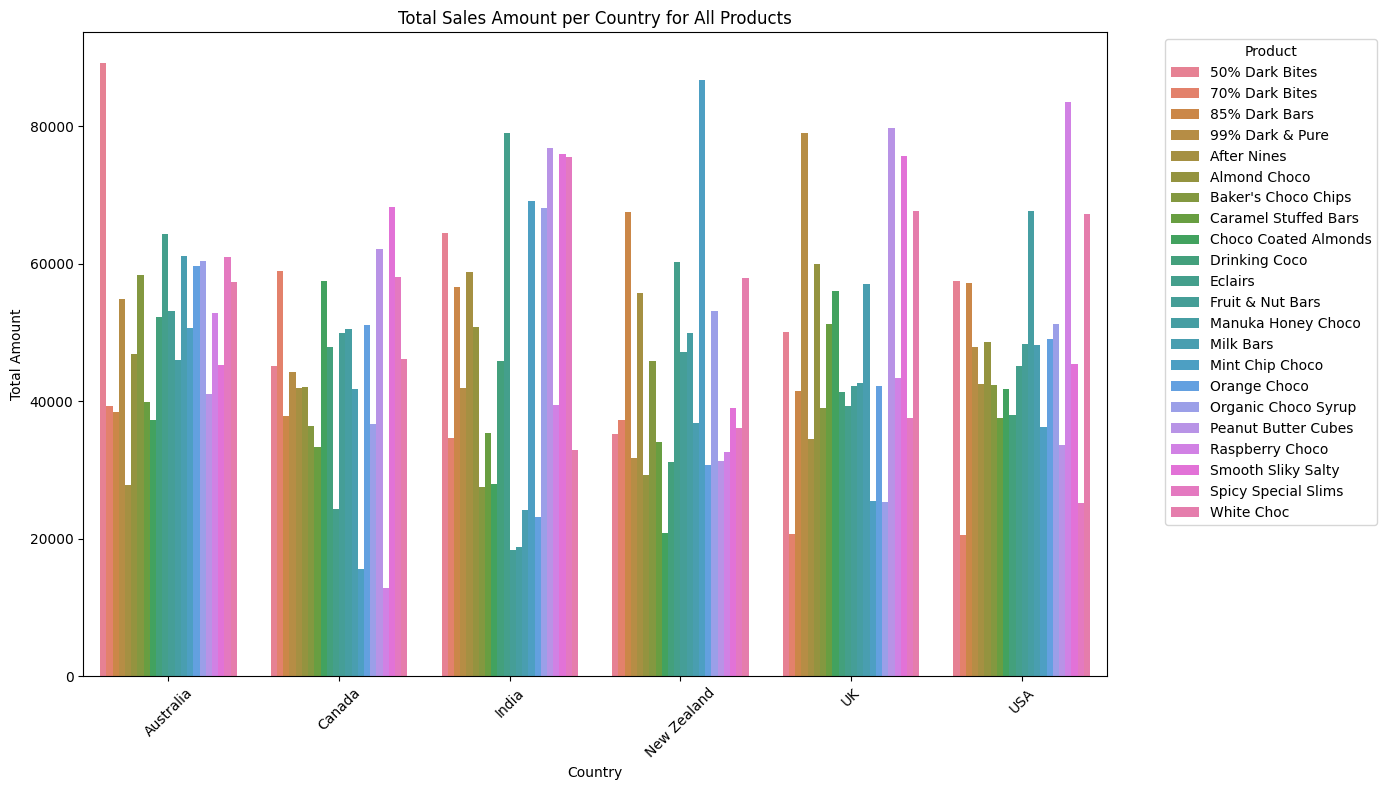

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped by Country, Product, Year, and Month
grouped_country = df.groupby(['Country', 'Product', 'Year', 'Month'])[['Amount', 'Boxes Shipped']].sum().reset_index()

# Step 1: Total sales amount per Country and Product
country_product_totals = grouped_country.groupby(['Country', 'Product'])['Amount'].sum().reset_index()

# Step 2: Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=country_product_totals, x='Country', y='Amount', hue='Product')

# Step 3: Formatting
plt.title('Total Sales Amount per Country for All Products')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
# Find out how many sales persons are there
# Plot values per country -- for all the products
# Plot individual sales per week
# Try using per sales person prediction (or) per product prediction (did this now)
# Try with batch size 5-10 and more, plot training and vlidation error, see where traning error
# -- dropped drastically and model is starting to overfit, use that model to see performance on test dataset
# Predict for next 2-3 months and plot results.

In [12]:
#Grouped by Country,Product,Year and Month
grouped_date = df.groupby([ 'Product', 'Date'])[['Amount', 'Boxes Shipped']].sum().reset_index()
grouped_date = grouped_date.sort_values(by=['Product', 'Date']).reset_index(drop=True)
grouped_date.head(20)

,Product,Date,Amount,Boxes Shipped
0,50% Dark Bites,2022-01-04,3024,23
1,50% Dark Bites,2022-01-12,5250,293
2,50% Dark Bites,2022-01-13,11844,281
3,50% Dark Bites,2022-01-14,5194,418
4,50% Dark Bites,2022-01-17,6678,708
5,50% Dark Bites,2022-01-27,9765,85
6,50% Dark Bites,2022-01-28,581,65
7,50% Dark Bites,2022-01-31,13482,15
8,50% Dark Bites,2022-02-09,2499,271
9,50% Dark Bites,2022-02-11,10458,316


In [13]:
# Step 1: Ensure 'Date' is datetime type
grouped_date['Date'] = pd.to_datetime(grouped_date['Date'])

# Step 2: Set 'Date' as index
grouped_date = grouped_date.set_index('Date')

# Step 3: Group by 'Product' and resample weekly (weeks starting on Monday)
weekly = (
    grouped_date.groupby('Product')
                .resample('W-MON')[['Amount', 'Boxes Shipped']]
                .sum()
                .reset_index()
)

# Step 4: Sort (optional)
weekly = weekly.sort_values(by=['Product', 'Date']).reset_index(drop=True)

# Show result
weekly.head(10)


,Product,Date,Amount,Boxes Shipped
0,50% Dark Bites,2022-01-10,3024,23
1,50% Dark Bites,2022-01-17,28966,1700
2,50% Dark Bites,2022-01-24,0,0
3,50% Dark Bites,2022-01-31,23828,165
4,50% Dark Bites,2022-02-07,0,0
5,50% Dark Bites,2022-02-14,12957,587
6,50% Dark Bites,2022-02-21,18795,234
7,50% Dark Bites,2022-02-28,0,0
8,50% Dark Bites,2022-03-07,24332,418
9,50% Dark Bites,2022-03-14,11711,154


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [15]:
# 1. Prepare data: select columns & replace 0 with NaN
weekly_small = weekly[['Date', 'Product', 'Amount']].copy()
weekly_small['Amount'] = weekly_small['Amount'].replace(0, np.nan)

In [16]:
# 2. Outlier treatment using IQR capping per product
def remove_outliers_iqr(group):
    Q1 = group['Amount'].quantile(0.25)
    Q3 = group['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group['Amount'] = np.where(group['Amount'] < lower_bound, lower_bound, group['Amount'])
    group['Amount'] = np.where(group['Amount'] > upper_bound, upper_bound, group['Amount'])
    return group

weekly_small = weekly_small.groupby('Product').apply(remove_outliers_iqr).reset_index(drop=True)

In [17]:
# 3. Optional: smoothing with rolling mean (window = 5)
def smooth_amount(group, window=3):
    group['Amount'] = group['Amount'].rolling(window, min_periods=1, center=True).mean()
    return group

weekly_small = weekly_small.groupby('Product').apply(smooth_amount).reset_index(drop=True)

In [18]:
# 4. Interpolation of missing values after outlier treatment & smoothing
weekly_small = weekly_small.sort_values(['Product', 'Date']).reset_index(drop=True)
def interpolate_amount(group):
    group['Amount'] = group['Amount'].interpolate(method='linear', limit_direction='both')
    return group

interpolated = weekly_small.groupby('Product').apply(interpolate_amount).reset_index(drop=True)

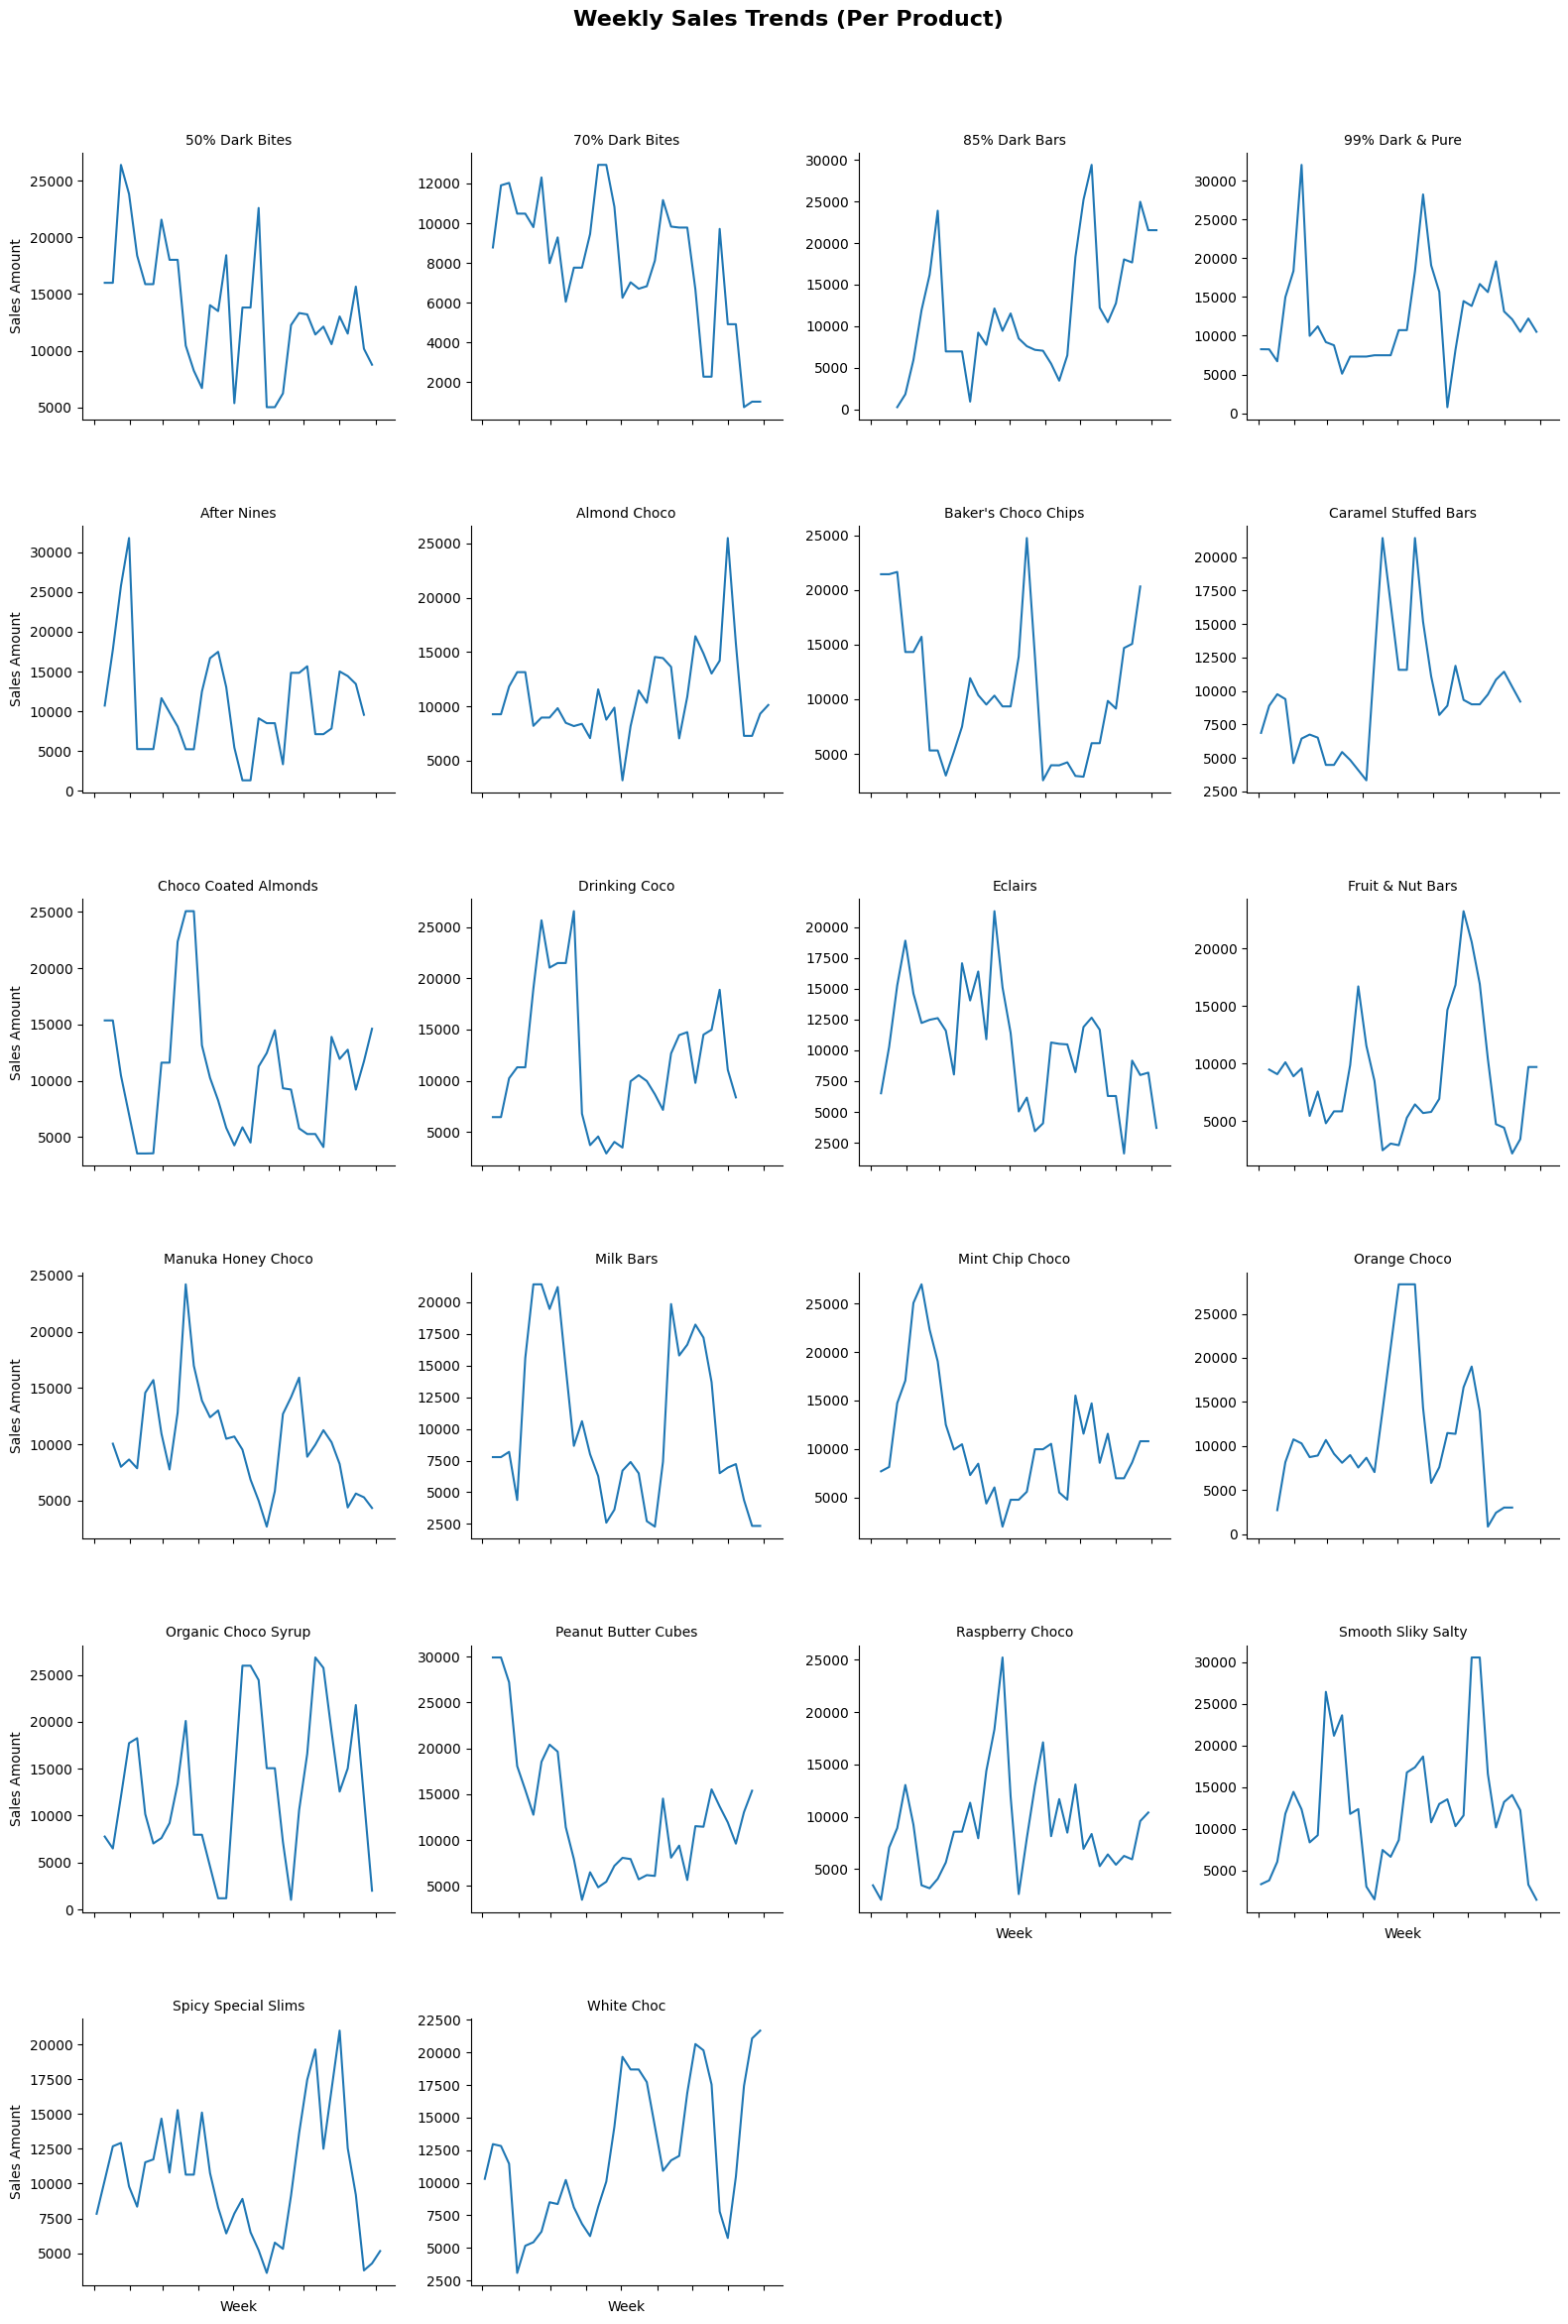

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create faceted grid with 4 charts per row and spacing between rows
g = sns.FacetGrid(interpolated, col='Product', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='Date', y='Amount')
g.set_titles('{col_name}')
g.set_axis_labels('Week', 'Sales Amount')
g.set_xticklabels(rotation=45)

# Add main title with space and spacing between rows
plt.subplots_adjust(top=0.92, hspace=0.4)  # top controls space above, hspace between rows
g.fig.suptitle('Weekly Sales Trends (Per Product)', fontsize=16, weight='bold')
plt.show()


In [19]:
# 5. Sequence creation function for LSTM
def create_sequence(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

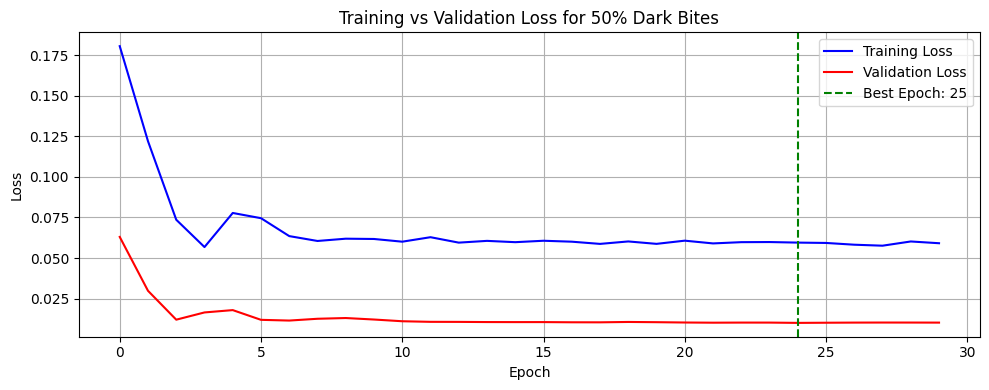

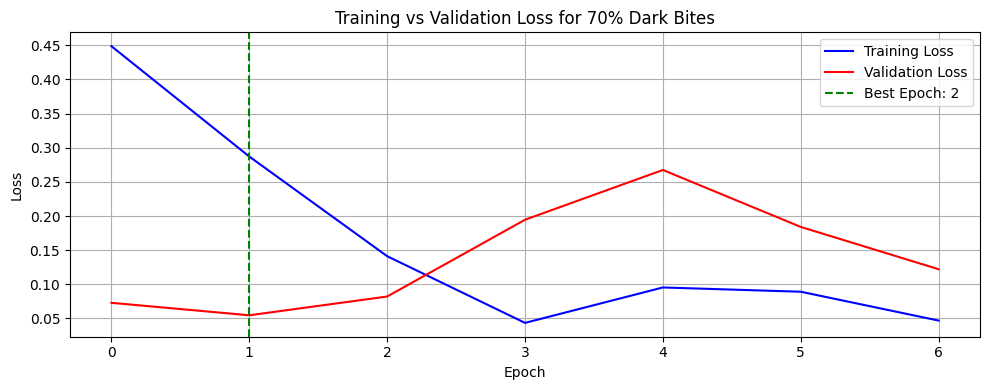

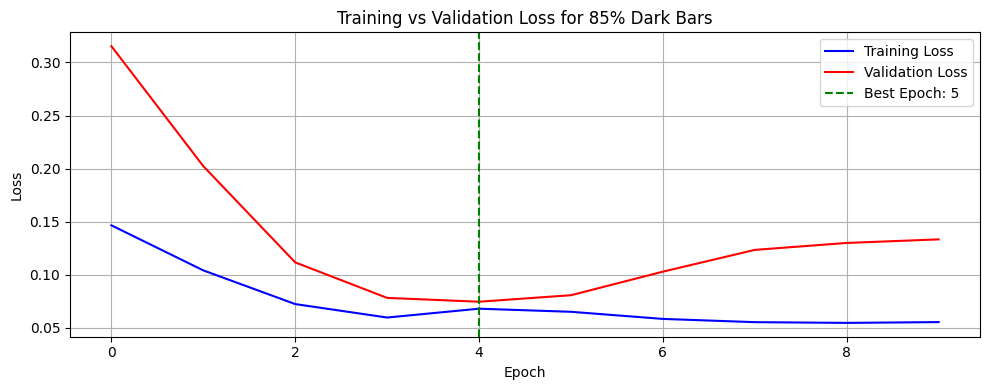

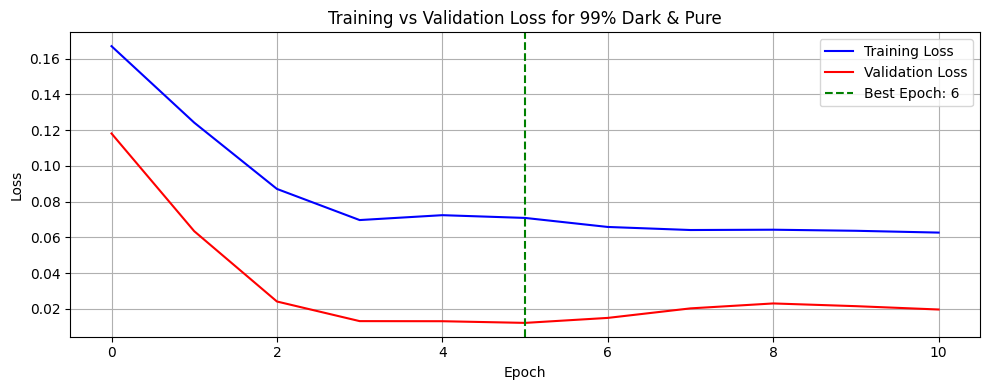

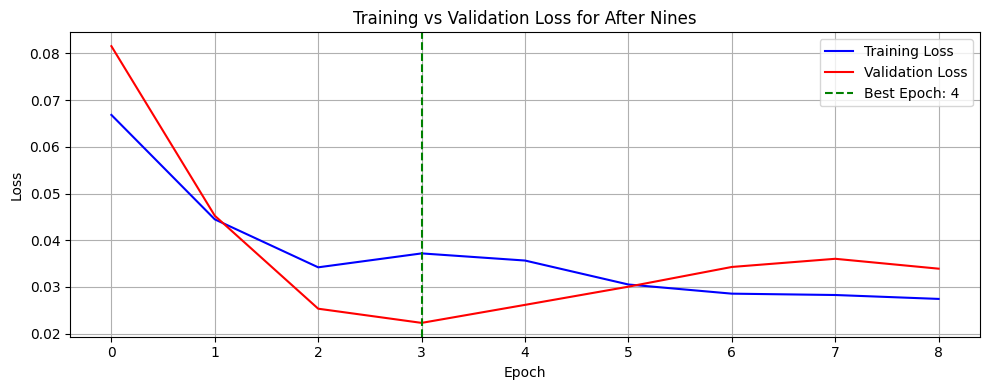

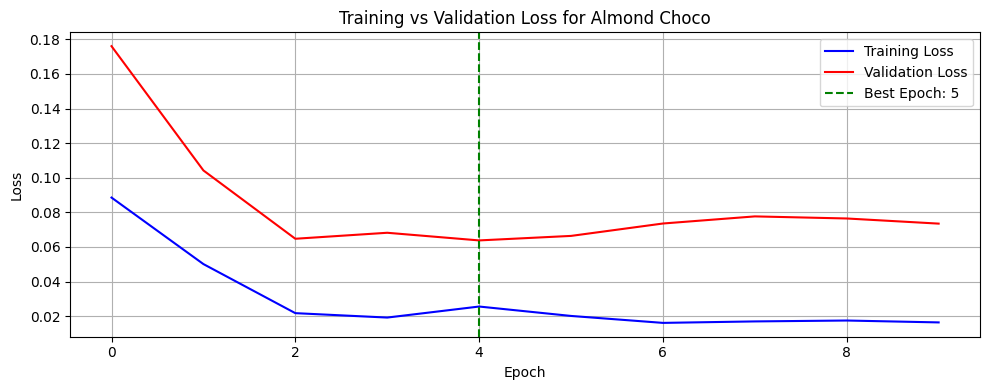

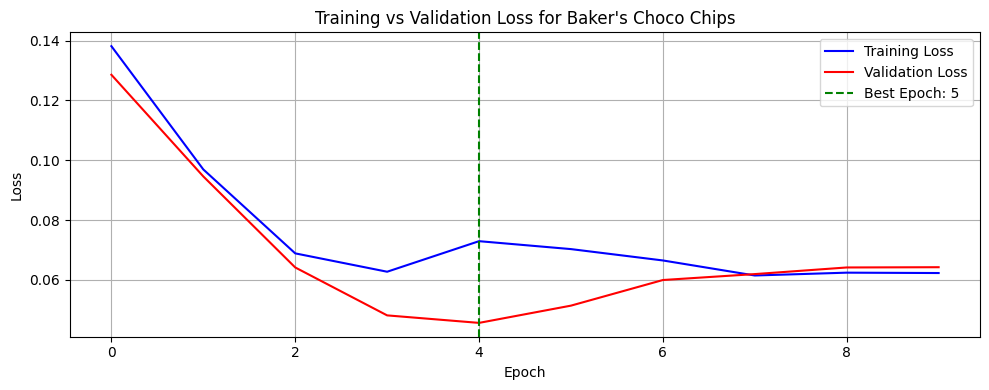

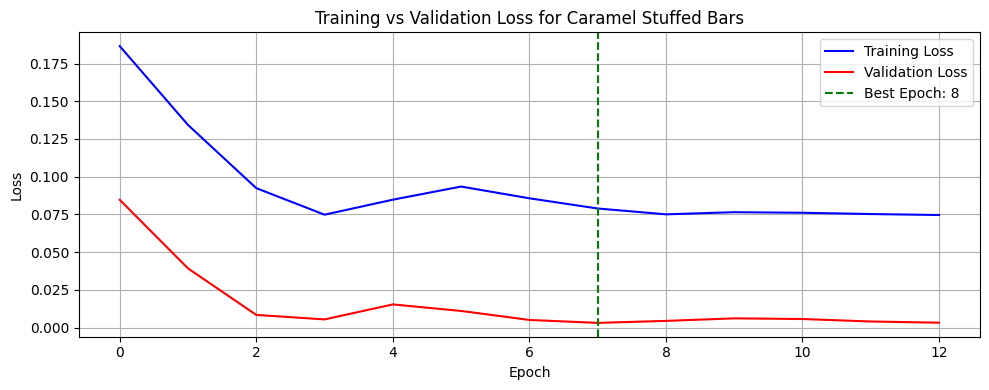

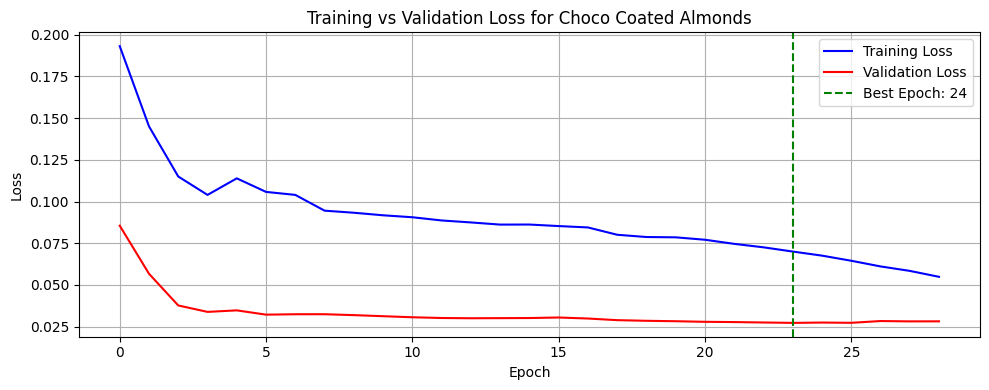

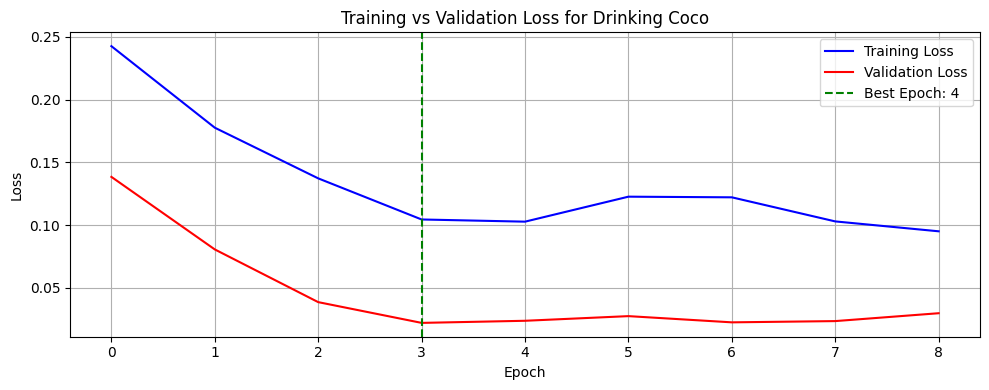

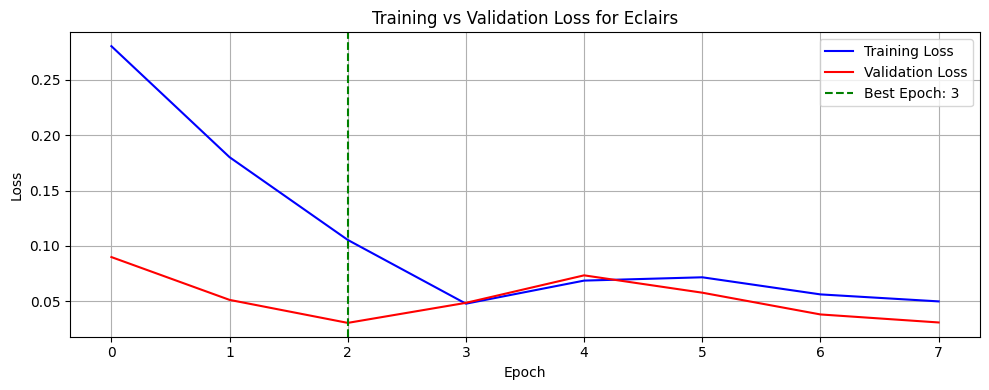

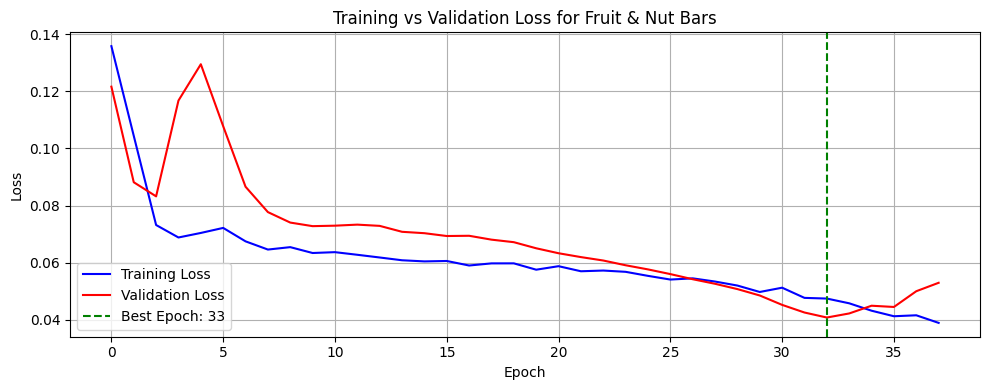

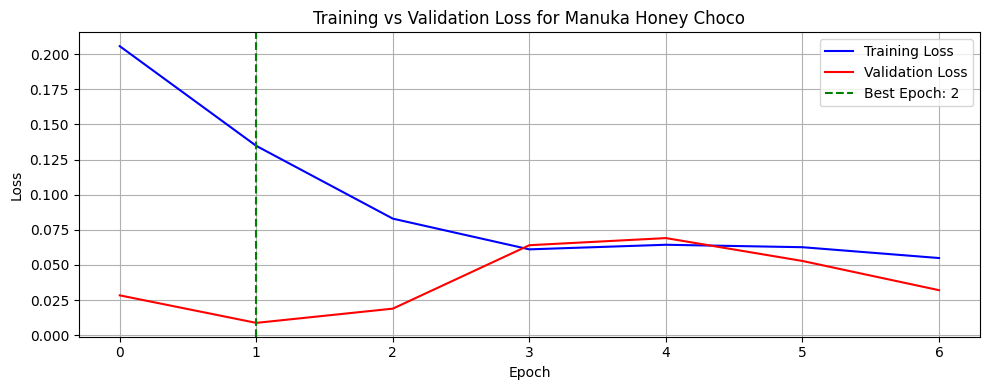

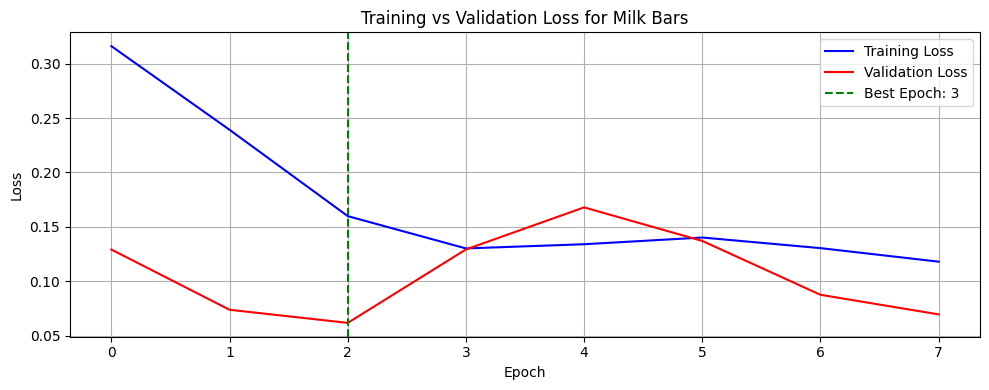

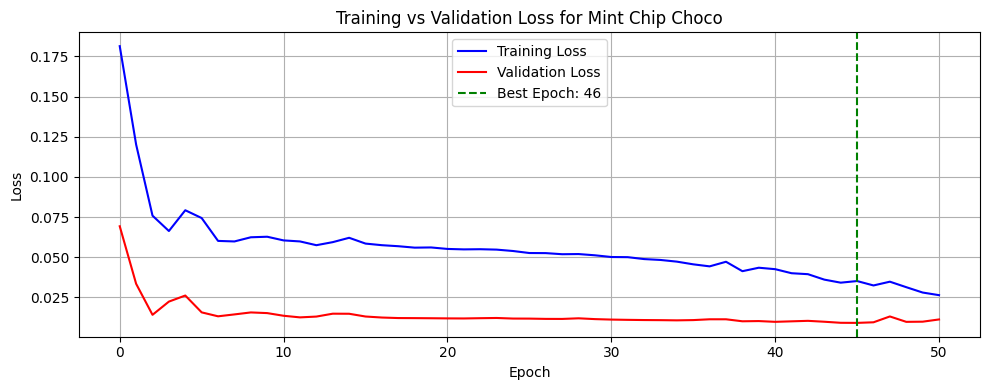

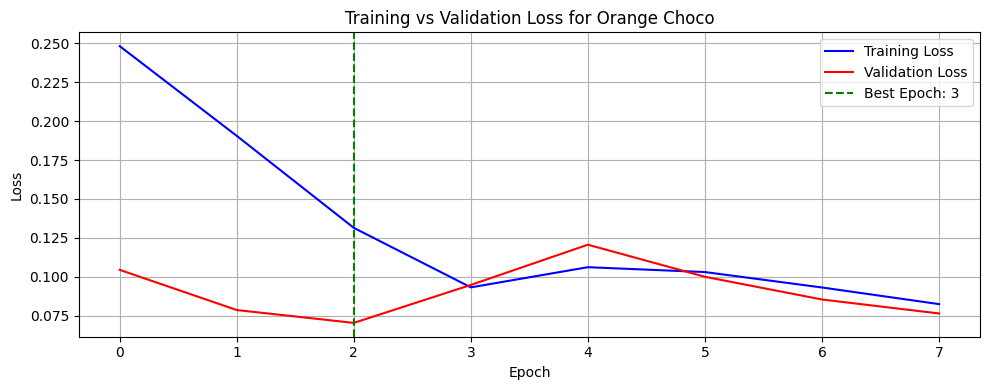

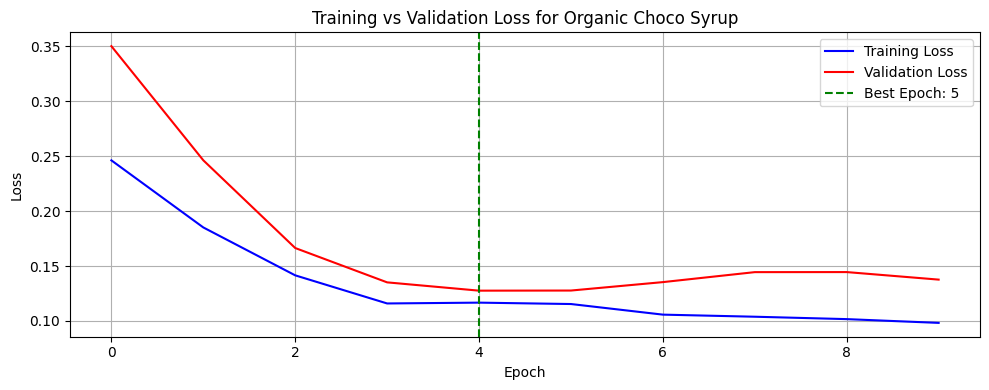

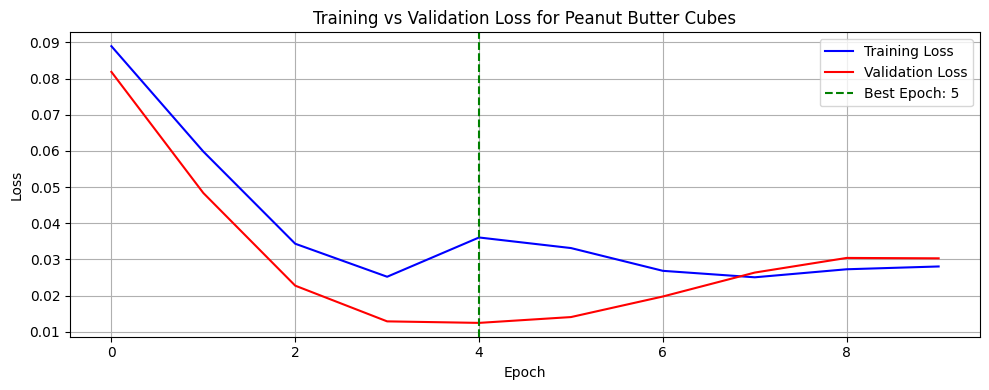

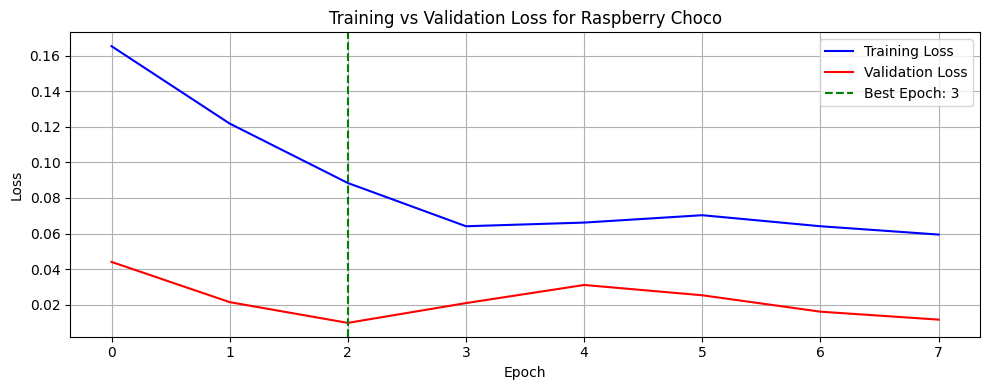

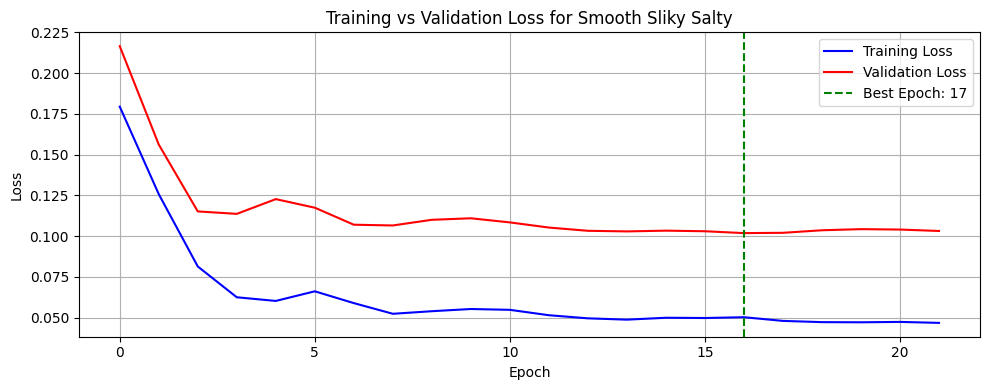

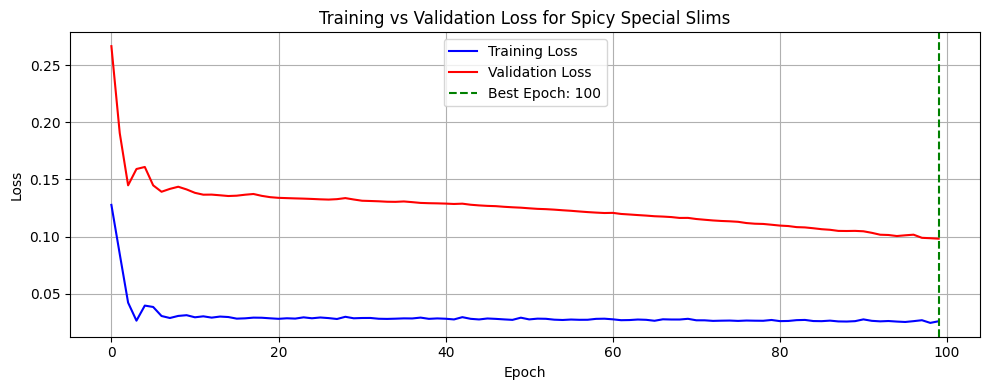

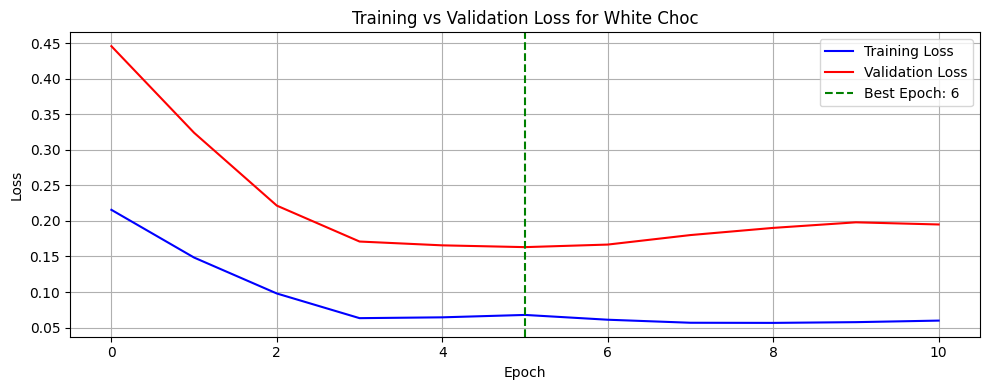

                 Product  Actual Weekly Avg  Predicted Weekly Avg  Best Epoch
0         50% Dark Bites            11833.9               11726.1          25
1         70% Dark Bites             3732.9                3592.7           2
2          85% Dark Bars            18738.7               17050.5           5
3        99% Dark & Pure            13873.1               13176.1           6
4            After Nines            11671.6                9637.3           4
5           Almond Choco            13381.1               13611.0           5
6    Baker's Choco Chips             9660.5                8269.4           5
7   Caramel Stuffed Bars            10076.9                9921.2           8
8   Choco Coated Almonds             9875.1               10306.0          24
9          Drinking Coco            13271.5               12571.2           4
10               Eclairs             7947.8                7559.2           3
11      Fruit & Nut Bars             9119.6                8481.

In [20]:
# 6. MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# 7. Model evaluation setup
product_names = []
mape_values = []
mae_values = []
rmse_values = []
rmse_percent_values = []
r2_values = []
actual_dict = {}
predicted_dict = []
best_epochs = []

products = interpolated['Product'].unique()
seq_length = 4

# 8. Loop through each product for model training, evaluation, and saving
for product in products:
    product_df = interpolated[interpolated['Product'] == product].sort_values(by='Date')
    product_df.set_index('Date', inplace=True)

    if len(product_df) < seq_length + 3:
        continue

    # Normalize Amount
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(product_df[['Amount']])

    # Create sequences
    X, y = create_sequence(scaled_data, seq_length)
    if len(X) == 0:
        continue

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

    # LSTM Model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(LSTM(90))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0,
                        validation_data=(X_test, y_test), callbacks=[early_stop])

    # Record best epoch
    best_epoch = np.argmin(history.history['val_loss']) + 1
    best_epochs.append(best_epoch)

    # Plot loss
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.axvline(best_epoch - 1, color='green', linestyle='--', label=f'Best Epoch: {best_epoch}')
    plt.title(f'Training vs Validation Loss for {product}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Predict and evaluate
    pred_scaled = model.predict(X_test, verbose=0)
    predicted_amounts = scaler.inverse_transform(pred_scaled).flatten()
    actual_amounts = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Error metrics
    mape = mean_absolute_percentage_error(actual_amounts, predicted_amounts)
    mae = mean_absolute_error(actual_amounts, predicted_amounts)
    rmse = np.sqrt(mean_squared_error(actual_amounts, predicted_amounts))
    rmse_percent = (rmse / np.mean(actual_amounts)) * 100
    r2 = r2_score(actual_amounts, predicted_amounts)

    # Store evaluation results
    mape_values.append(mape)
    mae_values.append(mae)
    rmse_values.append(rmse)
    rmse_percent_values.append(rmse_percent)
    r2_values.append(r2)
    product_names.append(product)
    actual_dict[product] = np.mean(actual_amounts)
    predicted_dict.append(np.mean(predicted_amounts))

# 9. Summary DataFrame
results_df = pd.DataFrame({
    'Product': product_names,
    'Actual Weekly Avg': [actual_dict[p] for p in product_names],
    'Predicted Weekly Avg': [float(p) for p in predicted_dict],
    'Best Epoch': best_epochs
}).round(1)


print(results_df)


In [21]:
print(X.shape,y.shape)

(31, 4, 1) (31, 1)


In [22]:
print(y_test.shape)

(10, 1)


In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the one-value-per-product lists
actual_means = results_df['Actual Weekly Avg'].values
predicted_means = results_df['Predicted Weekly Avg'].values

# Metrics
epsilon = 1e-10
mape_avg = np.mean(np.abs((actual_means - predicted_means) / (actual_means + epsilon))) * 100
mae_avg = mean_absolute_error(actual_means, predicted_means)
rmse_avg = np.sqrt(mean_squared_error(actual_means, predicted_means))
r2_avg = r2_score(actual_means, predicted_means)
rmse_pct = (rmse_avg / np.mean(actual_means)) * 100

# Print the results
print("\n📊 Evaluation Metrics Based on Weekly Averages per Product:")
print(f"MAPE      {mape_avg:.1f}")
print(f"MAE       {mae_avg:.1f}")
print(f"RMSE      {rmse_avg:.1f}")
print(f"RMSE %    {rmse_pct:.1f}%")
print(f"R2 Score  {r2_avg:.1f}")



📊 Evaluation Metrics Based on Weekly Averages per Product:
MAPE      6.1
MAE       725.2
RMSE      1053.4
RMSE %    9.4%
R2 Score  0.9


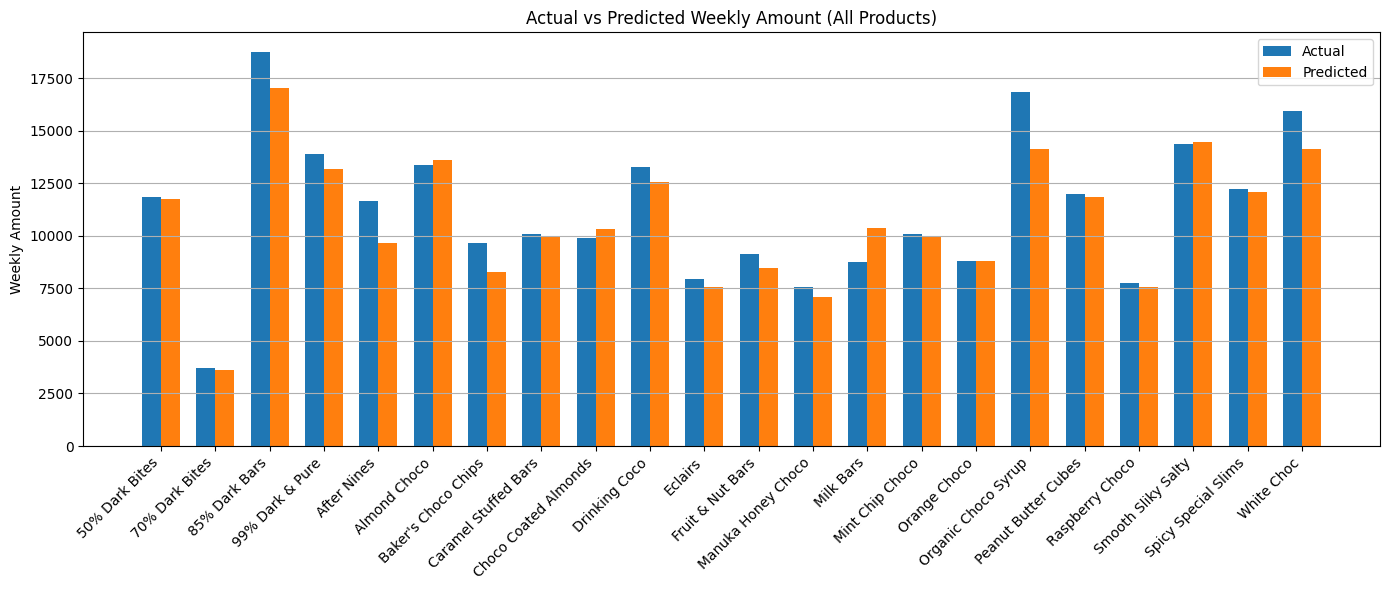

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values
product_names = results_df['Product'].tolist()
actual_values = results_df['Actual Weekly Avg'].tolist()
predicted_values = results_df['Predicted Weekly Avg'].tolist()
# mape_values = results_df['MAPE'].tolist()

# Bar Plot: Actual vs Predicted Weekly Averages
x = np.arange(len(product_names))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width/2, actual_values, width, label='Actual')
ax.bar(x + width/2, predicted_values, width, label='Predicted')

ax.set_ylabel('Weekly Amount')
ax.set_title('Actual vs Predicted Weekly Amount (All Products)')
ax.set_xticks(x)
ax.set_xticklabels(product_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()




In [29]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Forecast settings
seq_length = 4  # same as your training
forecast_horizon = 4  # number of weeks to predict
forecast_data = []

products = interpolated['Product'].unique()

for product in products:
    product_df = interpolated[interpolated['Product'] == product].sort_values('Date')
    product_df.set_index('Date', inplace=True)

    if len(product_df) < seq_length + forecast_horizon:
        continue

    # Scale Amount
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(product_df[['Amount']])

    # Create sequences for training
    X, y = [], []
    for i in range(len(scaled_data) - seq_length):
        X.append(scaled_data[i:i+seq_length])
        y.append(scaled_data[i+seq_length])
    X, y = np.array(X), np.array(y)

    # LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(0.1))
    model.add(LSTM(90))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=100, batch_size=8, verbose=0)

    # Start forecasting recursively
    input_seq = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    preds = []
    for _ in range(forecast_horizon):
        pred_scaled = model.predict(input_seq, verbose=0)
        pred_value = scaler.inverse_transform(pred_scaled)[0, 0]
        preds.append(pred_value)

        # Update input_seq for next prediction
        next_input = pred_scaled.reshape(1, 1, 1)
        input_seq = np.concatenate((input_seq[:, 1:, :], next_input), axis=1)

    forecast_data.append([product] + preds)

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_data, columns=['Product', 'Week+1', 'Week+2', 'Week+3', 'Week+4'])

# Save forecast (optional)
forecast_df.to_csv('forecast_next_4_weeks.csv', index=False)
print("✅ Forecasting complete and saved to 'forecast_next_4_weeks.csv'")


✅ Forecasting complete and saved to 'forecast_next_4_weeks.csv'


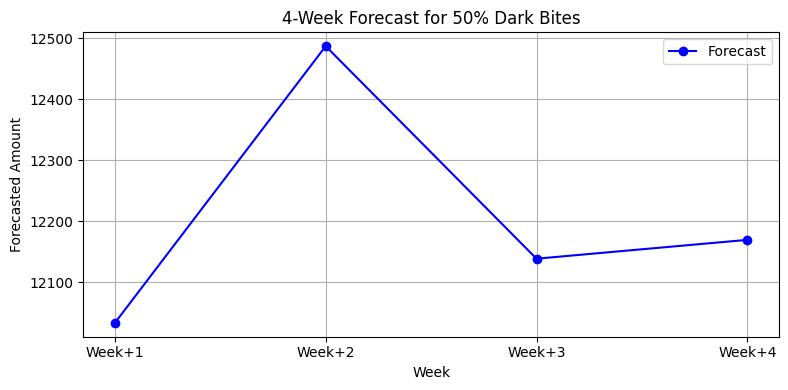

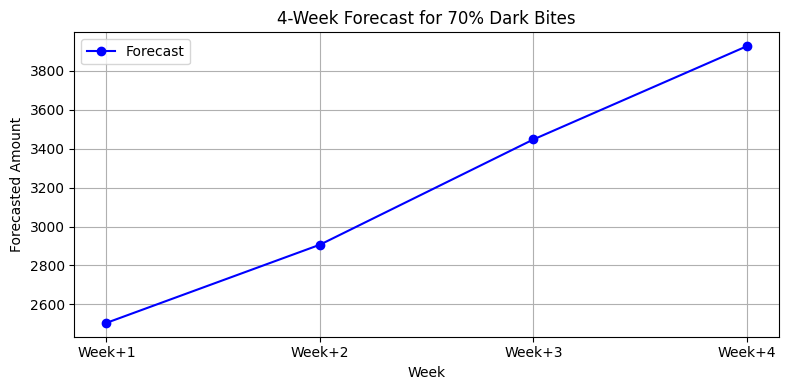

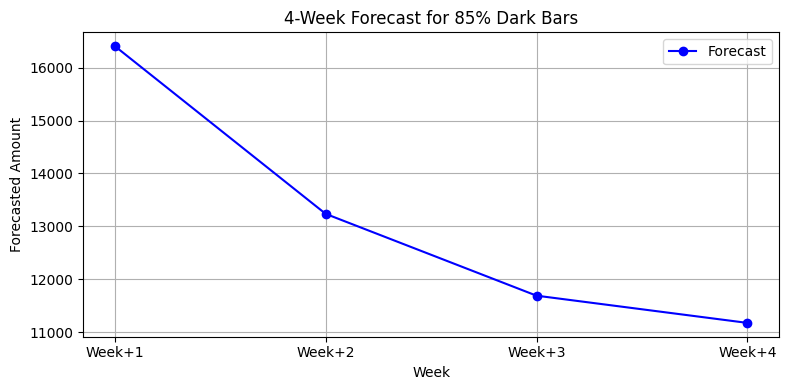

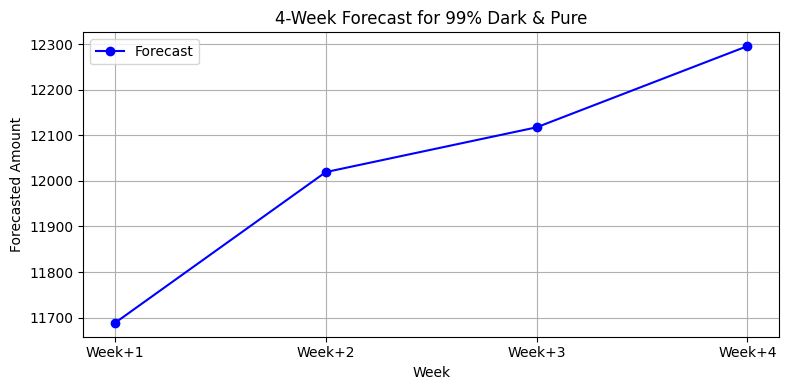

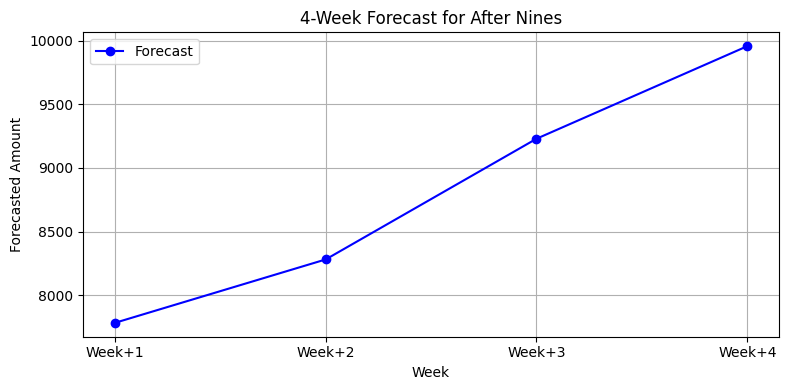

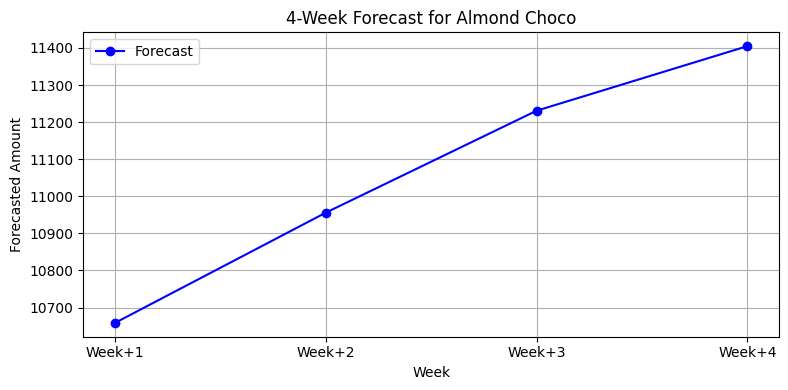

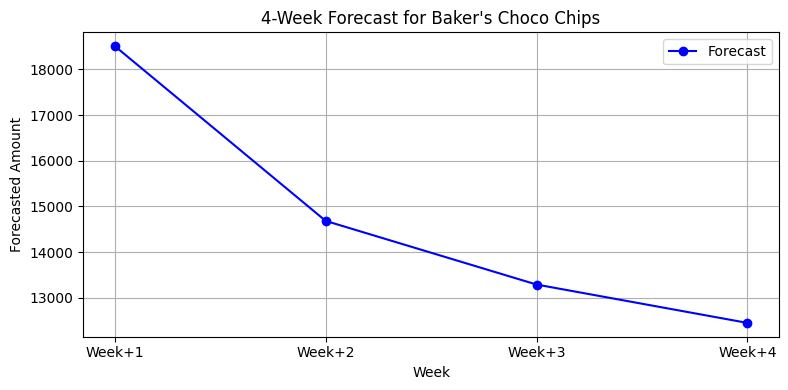

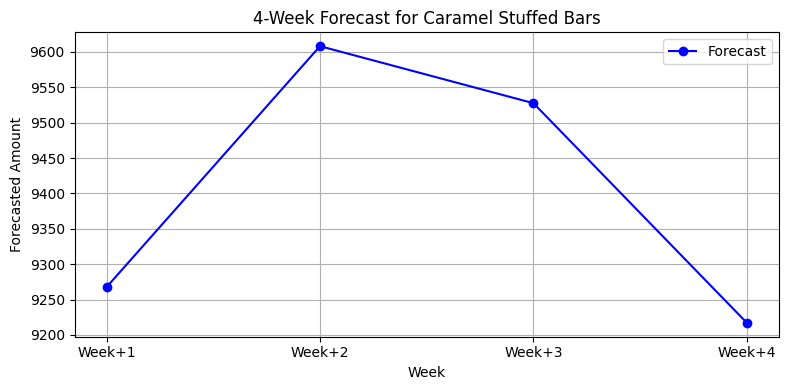

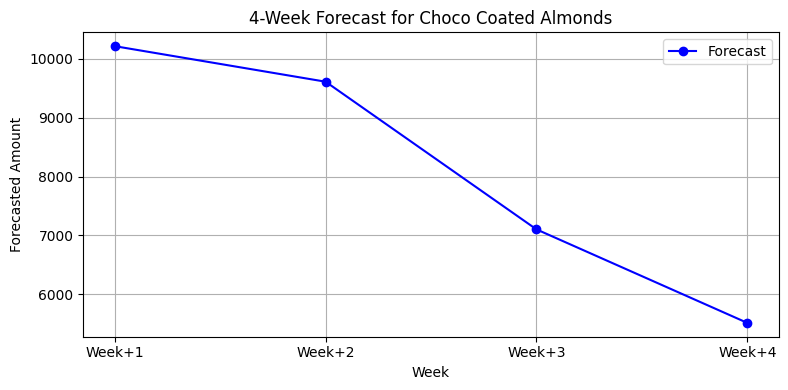

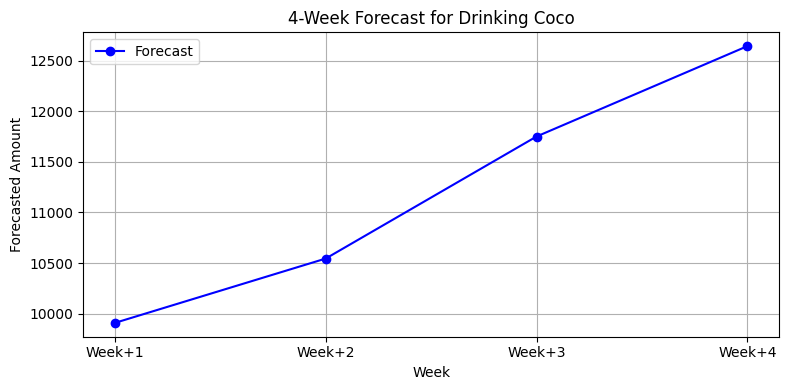

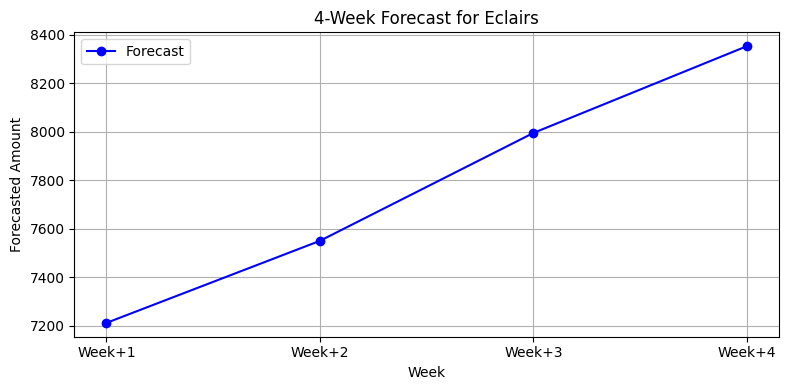

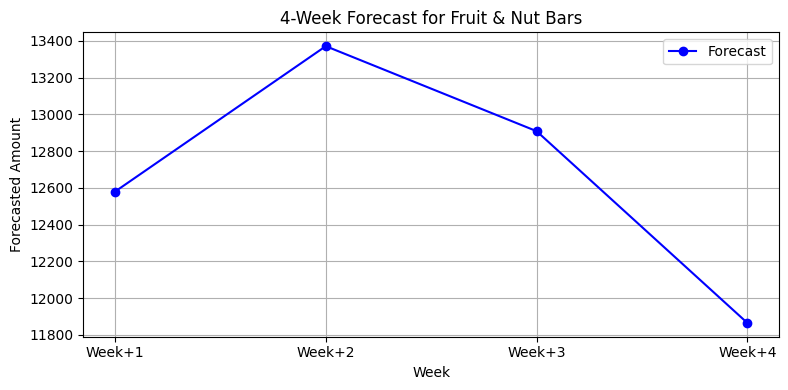

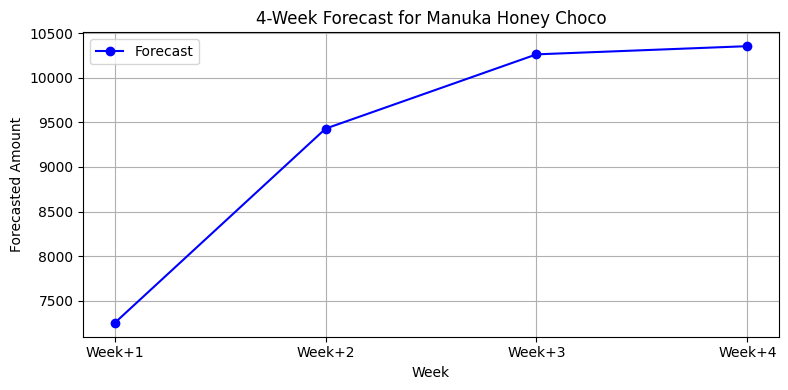

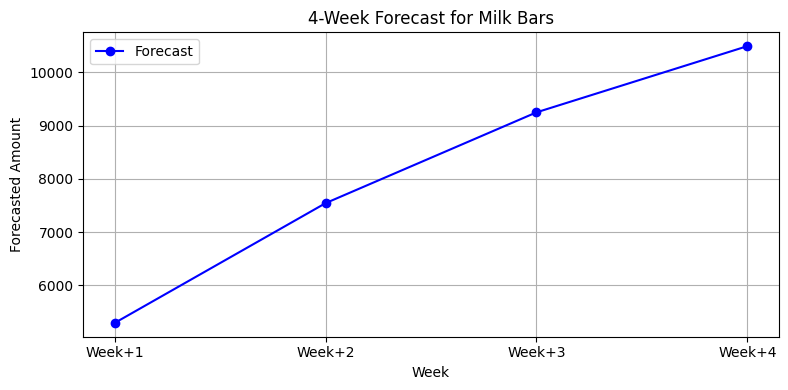

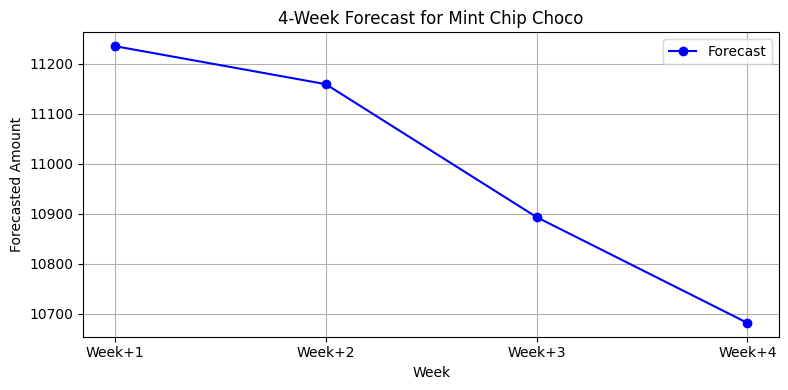

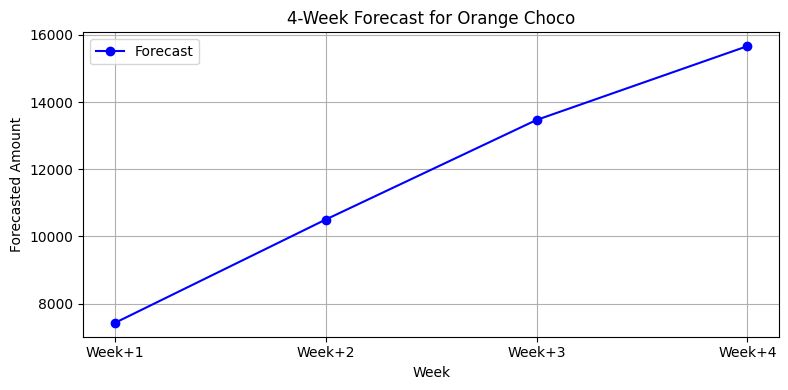

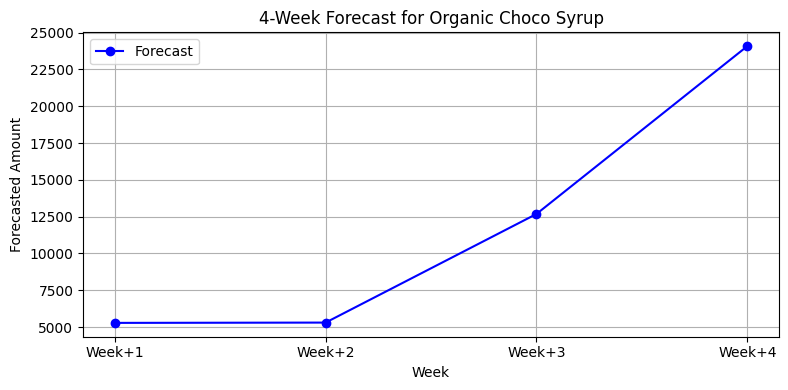

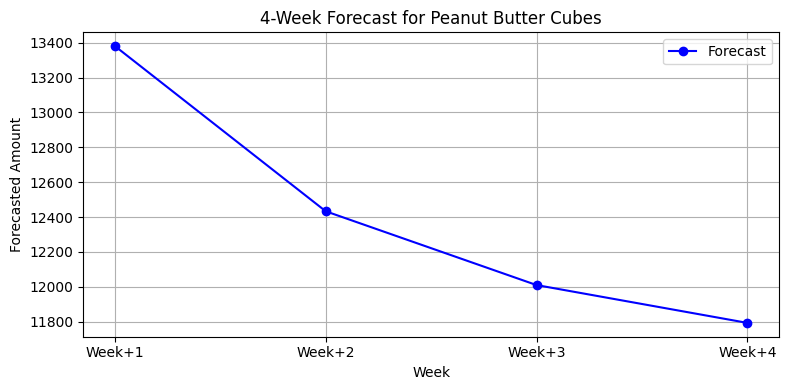

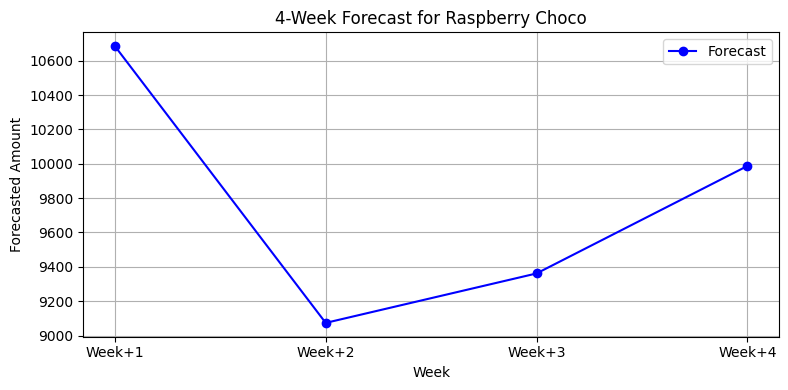

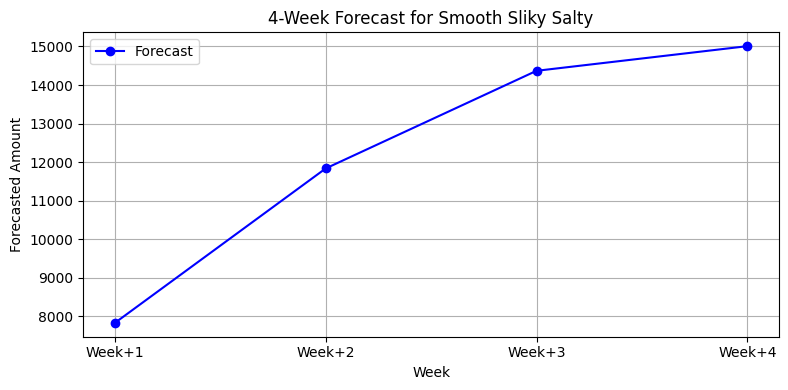

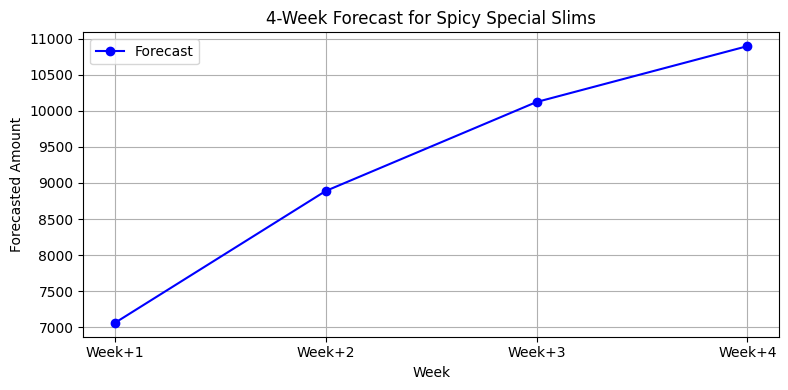

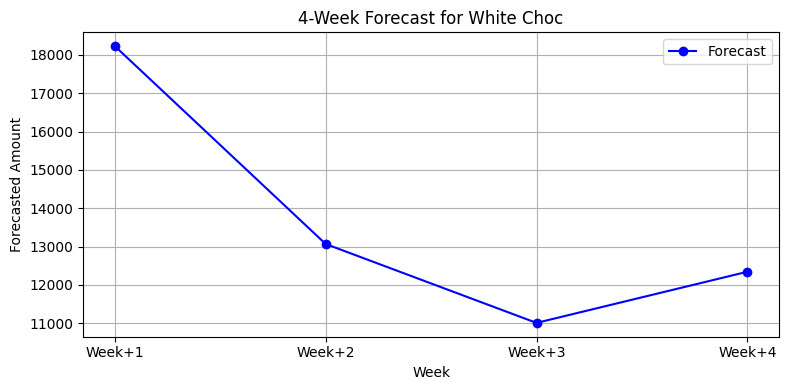

In [30]:
import matplotlib.pyplot as plt

# Plot forecasted values for each product
for index, row in forecast_df.iterrows():
    product = row['Product']
    weeks = ['Week+1', 'Week+2', 'Week+3', 'Week+4']
    values = row[weeks].values.astype(float)

    plt.figure(figsize=(8, 4))
    plt.plot(weeks, values, marker='o', linestyle='-', color='blue', label='Forecast')
    plt.title(f'4-Week Forecast for {product}')
    plt.xlabel('Week')
    plt.ylabel('Forecasted Amount')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [60]:
import plotly.graph_objects as go

# Define weeks and initialize figure
weeks = ['Week+1', 'Week+2', 'Week+3', 'Week+4']
fig = go.Figure()

# Add a bar for each product
for index, row in forecast_df.iterrows():
    product = row['Product']
    values = row[weeks].values.astype(float)
    fig.add_trace(go.Bar(
        x=weeks,
        y=values,
        name=product
    ))

fig.update_layout(
    title='📦 4-Week Forecast for All Products',
    xaxis_title='Week',
    yaxis_title='Forecasted Amount',
    barmode='group',
    legend_title='Product',
    template='plotly_white',
    width=2500,
    height=600,
    yaxis=dict(
        tickformat=".1f",
        separatethousands=True,
        ticksuffix=""
    ),
    hoverlabel=dict(
        font_size=20,
        font_family="Arial"
    )
)


# Show the interactive plot
fig.show()